<a href="https://colab.research.google.com/github/michaelmusun/ML-Projects/blob/main/Seoul-Bike-Rental-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer

import time
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Seoul bike-sharing demand data 
# Data import

bikedata = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')
# reading dataset
#print (bikedata.head())


In [ ]:
print(bikedata.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:
# check for missing values
print (bikedata.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [ ]:
bikedata['Date'] = pd.to_datetime(bikedata['Date'], errors='coerce')

In [ ]:
bikedata['WeekDay']=bikedata['Date'].dt.day_name()

In [ ]:
bikedata['Month']=bikedata['Date'].dt.month

In [ ]:
label_encoder = LabelEncoder()
# Encode labels in column 'Seasons'.
bikedata['Seasons']= label_encoder.fit_transform(bikedata['Seasons'])
bikedata['Seasons'].unique()

# Encode labels in column 'Holiday'.
bikedata['Holiday']= label_encoder.fit_transform(bikedata['Holiday'])
bikedata['Holiday'].unique()

# Encode labels in column 'Functioning Day'.
bikedata['Functioning Day']= label_encoder.fit_transform(bikedata['Functioning Day'])
bikedata['Functioning Day'].unique()

# Encode labels in column 'Week Day'.
bikedata['WeekDay']= label_encoder.fit_transform(bikedata['WeekDay'])
bikedata['WeekDay'].unique()


array([4, 3, 6, 0, 1, 2, 5])

In [ ]:
bikedata

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,4,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,4,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,4,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,4,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1,0,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1,0,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1,0,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1,0,11


In [ ]:
bikedata['Temperature(°C)'].plot(kind='hist')
plt.show()

In [ ]:
bikedata['Humidity(%)'].plot(kind='hist')
plt.show()

In [ ]:
bikedata['Wind speed (m/s)'].plot(kind='hist')
plt.show()

In [ ]:
bikedata['Visibility (10m)'].plot(kind='hist')
plt.show()

In [ ]:
bikedata['Solar Radiation (MJ/m2)'].plot(kind='hist')
plt.show()

In [ ]:
bikedata['Rainfall(mm)'].plot(kind='hist')
plt.show()

In [ ]:
plt.title("Hours")
bikedata['Hour'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
plt.title("Months")
bikedata['Month'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
bikedata.skew().sort_values(ascending=True) # Snowfall and Rainfall are highly skewed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Functioning Day              -5.170969
Holiday                      -4.163603
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
WeekDay                      -0.022521
Month                        -0.010458
Hour                          0.000000
Seasons                       0.004382
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

In [ ]:
corrMatrix = bikedata.corr()

fig, ax = plt.subplots(figsize=(12,12)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

Label encoding for 'Seasons' , 'Holiday' , 'Functioning Day'

In [ ]:
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);

In [ ]:
rented_bike_corr = pd.DataFrame(corrMatrix.iloc[:, 0])

In [ ]:
significant = rented_bike_corr[abs(rented_bike_corr) >= 0.05]
significant['Use'] = significant['Rented Bike Count'].notna()

In [ ]:
significant_col = significant.index[significant['Use']].tolist()
significant_col.remove('Rented Bike Count')
significant_col.remove('Dew point temperature(°C)') # Due to high correlation with regular temperature
significant_col.remove('Rainfall(mm)') # Highly skewed towards 0
significant_col.remove('Snowfall (cm)') # Highly skewed towards 0
print(significant_col)

['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Seasons', 'Holiday', 'Functioning Day', 'Month']


In [ ]:
bikedata[significant_col]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,Month
0,0,-5.2,37,2.2,2000,0.0,3,1,1,1
1,1,-5.5,38,0.8,2000,0.0,3,1,1,1
2,2,-6.0,39,1.0,2000,0.0,3,1,1,1
3,3,-6.2,40,0.9,2000,0.0,3,1,1,1
4,4,-6.0,36,2.3,2000,0.0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,0,1,1,11
8756,20,3.4,37,2.3,2000,0.0,0,1,1,11
8757,21,2.6,39,0.3,1968,0.0,0,1,1,11
8758,22,2.1,41,1.0,1859,0.0,0,1,1,11


In [ ]:
X = bikedata[significant_col]
y = bikedata['Rented Bike Count']

KMEANS

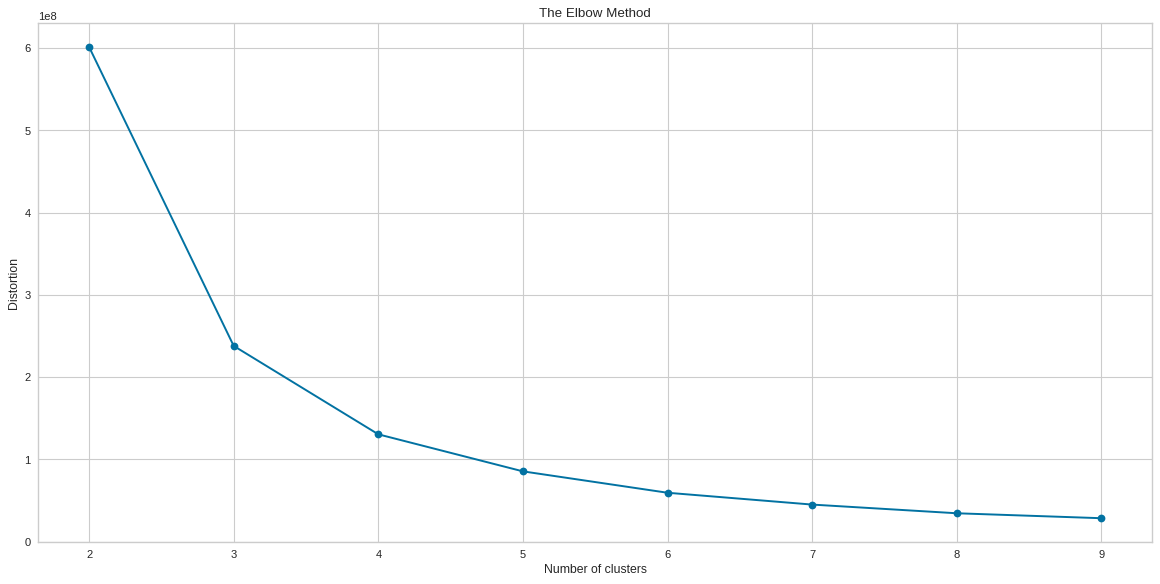

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []
figure(figsize=(16, 8), dpi=80)

for i in range(2, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
#Obtain the best value of K using SSE
plt.plot(range(2, 10), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Kmeans Optimal Clusters: 3
Kmeans Time: 0.158s
Davis-Bouldin: 0.46
CSM: 0.694


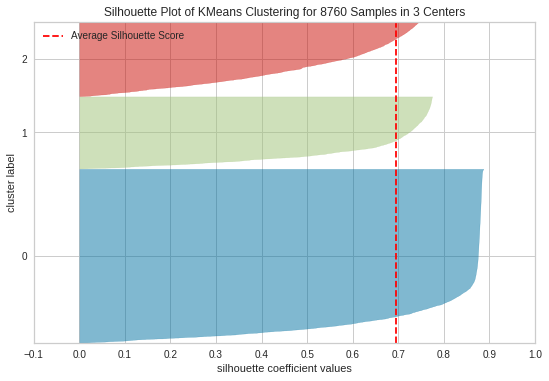

In [ ]:
start = time.time()
kmeans_best_clusters = 3
kmeans = KMeans(n_clusters=kmeans_best_clusters, random_state=0,).fit(X) # By using an Elbow Method for K-means clustering we find the optimal number of clusters to be = 3

# X['kmeans'] = kmeans.labels_
# display(X.cluster.value_counts())

print(f"Kmeans Optimal Clusters: {kmeans_best_clusters}")
print(f"Kmeans Time: {round(time.time() - start,3)}s")
# print(f"SSE: {kmeans.inertia_}")
kmeans_davis_bouldin = metrics.davies_bouldin_score(X, kmeans.labels_)
print(f"Davis-Bouldin: {kmeans_davis_bouldin:.2f}")
kmeans_csm = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('CSM: %.3f' % kmeans_csm)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

DBSCAN

In [ ]:
start = time.time()
db = DBSCAN(eps=3, min_samples=2).fit(X)
# X['dbscan'] = db.labels_

print(f"DBSCAN Time: {round(time.time() - start,3)}s")
db_davis_bouldin = metrics.davies_bouldin_score(X, db.labels_)
print(f"Davis-Bouldin: {db_davis_bouldin:.2f}")
db_csm = metrics.silhouette_score(X, db.labels_)
print(f"CSM: {db_csm:.2f}")

# db.n_clusters = len(set(db.labels_))

# visualizer = SilhouetteVisualizer(db, colors='yellowbrick', is_fitted=True)
# visualizer.fit(X)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure


DBSCAN Time: 0.119s
Davis-Bouldin: 1.32
CSM: -0.71


Agglomerative Clustering

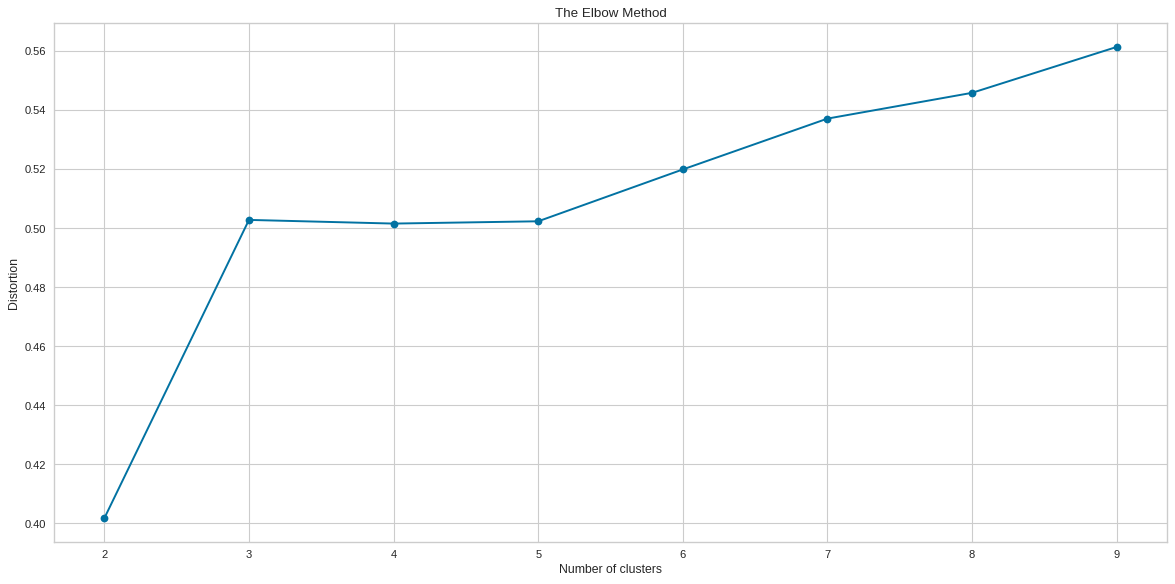

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []
figure(figsize=(16, 8), dpi=80)

for i in range(2, 10):
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit(X)
    agg_davis_bouldin = metrics.davies_bouldin_score(X, agg.labels_)
    distortions.append(agg_davis_bouldin)

# plot
#Obtain the best value of K using SSE
plt.plot(range(2, 10), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
start = time.time()
agg_best_clusters = 2
agg = AgglomerativeClustering(n_clusters=i).fit(X)

print(f"Agglomerative Optimal Clusters: {agg_best_clusters}")
print(f"Agglomerative Time: {round(time.time() - start,3)}s")
# print(f"SSE: {kmeans.inertia_}")
agg_davis_bouldin = metrics.davies_bouldin_score(X, agg.labels_)
print(f"Davis-Bouldin: {agg_davis_bouldin:.2f}")
agg_csm = silhouette_score(X, agg.labels_, metric='euclidean')
print('CSM: %.3f' % agg_csm)

# visualizer = SilhouetteVisualizer(agg, colors='yellowbrick')
# visualizer.fit(X)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

Agglomerative Optimal Clusters: 2
Agglomerative Time: 4.787s
Davis-Bouldin: 0.56
CSM: 0.563


In [ ]:
# centroids = np.array(kmeans.cluster_centers_)
# centroids = PCA(n_components=2).fit_transform(centroids)

In [ ]:
# # Run PCA on the data and reduce the dimensions in pca_num_components dimensions
# reduced_data = PCA(n_components=2).fit_transform(X)
# results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
# centroids_x = centroids[:,0]
# centroids_y = centroids[:,1]
# ax = sns.set(rc={"figure.figsize":(24, 12)})
# ax = sns.scatterplot(x="pca1", y="pca2", hue=X['cluster'], data=results, palette="bright", alpha=0.6, s=50, legend='full')
# ax = sns.scatterplot(centroids_x, centroids_y, hue=range(kmeans.n_clusters),s=100, palette="bright", ec='black', legend=False, marker='X',ax=ax)
# plt.title('K-means Clustering with 2 dimensions')
# plt.show()

In [ ]:
# bikedata['Date'] = pd.to_numeric(pd.to_datetime(bikedata['Date']))
# # label encoding

# label_encoder = LabelEncoder()
# # Encode labels in column 'species'.
# bikedata['Seasons']= label_encoder.fit_transform(bikedata['Seasons'])
# bikedata['Seasons'].unique()

# # Encode labels in column ''.
# bikedata['Holiday']= label_encoder.fit_transform(bikedata['Holiday'])
# bikedata['Holiday'].unique()

# # Encode labels in column ''.
# bikedata['Functioning Day']= label_encoder.fit_transform(bikedata['Functioning Day'])
# bikedata['Functioning Day'].unique()

# # Encode labels in column ''.
# bikedata['WeekDay']= label_encoder.fit_transform(bikedata['WeekDay'])
# bikedata['WeekDay'].unique()

# kmeans_kwargs = {
#     "init": "random",
#     "n_init": 10,
#     "max_iter": 300,
#     "random_state": 40,
#     }


# # A list holds the silhouette coefficients for each k
# silhouette_coefficients = []
# # Notice you start at 2 clusters for silhouette coefficient
# for k in range(2, 11):
#   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#   kmeans.fit(bikedata)
#   score = silhouette_score(bikedata, kmeans.labels_)
#   silhouette_coefficients.append(score)

# plt.style.use("fivethirtyeight")
# plt.plot(range(2, 11), silhouette_coefficients)
# plt.xticks(range(2, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.show()

In [ ]:
# import numpy as np
# from sklearn.neighbors import NearestNeighbors
# # n_neighbors = 8 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
# nbrs = NearestNeighbors(n_neighbors=8).fit(bikedata)
# # Find the k-neighbors of a point
# neigh_dist, neigh_ind = nbrs.kneighbors(bikedata)
# # sort the neighbor distances (lengths to points) in ascending order
# # axis = 0 represents sort along first axis i.e. sort along row
# sort_neigh_dist = np.sort(neigh_dist, axis=0)

# import matplotlib.pyplot as plt
# k_dist = sort_neigh_dist[:, 7]
# plt.plot(k_dist)
# plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
# plt.ylabel("k-NN distance")
# plt.xlabel("Sorted observations (4th NN)")
# plt.show()

# from sklearn.cluster import DBSCAN
# from sklearn import metrics
# from sklearn.preprocessing import QuantileTransformer
# #Initialize our scaler
# scaler = QuantileTransformer(output_distribution='uniform')
# X = pd.DataFrame(scaler.fit_transform(bikedata))

# # Compute DBSCAN
# db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)


In [ ]:
comments: 

#all with csm plots

#DBSCAN w/ CSM
#Hierarchial w/ CSM

#question 2


